# WeatherPy

---Create a Python script to visualize the weather of over 500 cities of varying distances from the equator. Request an API keys from OpenWeatherMap.org.Import the api keys froem weather api keys.You can make an API call by city ID.Here you can select the url by city id.Then need to install pip install citypy . 
---Create a series of scatter plots to showcase the following relationships: Latitude vs. Temperature,Latitude vs. Humidity,Latitude vs. Cloudiness,Latitude vs. Wind Speed.
---Compute Linear Regression for Each Relationship:Separate the plots into Northern Hemisphere and Separate the plots into Northern Hemisphere.
---Create the following plots:Northern Hemisphere: Temperature vs. Latitude,Southern Hemisphere: Temperature vs. Latitude,Northern Hemisphere: Humidity vs. Latitude,Southern Hemisphere: Humidity vs. Latitude,Northern Hemisphere: Cloudiness vs. Latitude,Southern Hemisphere: Cloudiness vs. Latitude,Northern Hemisphere: Wind Speed vs. Latitude,Southern Hemisphere: Wind Speed vs. Latitude.

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy
#output_data_file = "output_data/cities.csv"

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0],lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0],lng_range [1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 604


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
#q={city}&appid={weather_api_key}"
#print(url)
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    
    city_url = url+f"q={city}&appid={weather_api_key}"
   
    
    # Log the url, record, and set numbers
    #print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat =  city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({
                          "City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
        })
    # If an error is experienced, skip the city
    except:
        print(f"City not found. Skipping...|{city}")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cidreira
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | malesherbes
Processing Record 4 of Set 1 | lata
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | hawaiian paradise park
Processing Record 7 of Set 1 | blackmans bay
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | bemaitso
City not found. Skipping...|bemaitso
Processing Record 10 of Set 1 | tazovsky
Processing Record 11 of Set 1 | edinburgh of the seven seas
Processing Record 12 of Set 1 | taiohae
City not found. Skipping...|taiohae
Processing Record 13 of Set 1 | bethel
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | purpe
Processing Record 16 of Set 1 | portland
Processing Record 17 of Set 1 | iqaluit
Processing Record 18 of Set 1 | san jose village
City not found. Skipping...|san jose village
Processing Record 19 of Set 1 | kostomuksha
Pro

Processing Record 36 of Set 4 | selfoss
Processing Record 37 of Set 4 | krasnyy chikoy
Processing Record 38 of Set 4 | udachny
Processing Record 39 of Set 4 | pisco
Processing Record 40 of Set 4 | wakkanai
Processing Record 41 of Set 4 | cabo san lucas
Processing Record 42 of Set 4 | tobi village
City not found. Skipping...|tobi village
Processing Record 43 of Set 4 | saint-francois
Processing Record 44 of Set 4 | hammerfest
Processing Record 45 of Set 4 | hit
Processing Record 46 of Set 4 | dudinka
Processing Record 47 of Set 4 | oranjemund
Processing Record 48 of Set 4 | sovetsk
Processing Record 49 of Set 4 | ma'an
Processing Record 0 of Set 5 | dunedin
Processing Record 1 of Set 5 | el grao
Processing Record 2 of Set 5 | serdar
Processing Record 3 of Set 5 | anabar
City not found. Skipping...|anabar
Processing Record 4 of Set 5 | rakops
Processing Record 5 of Set 5 | pubal
Processing Record 6 of Set 5 | chonchi
Processing Record 7 of Set 5 | nyurba
Processing Record 8 of Set 5 | fr

Processing Record 26 of Set 8 | vorkuta
Processing Record 27 of Set 8 | antsiranana
Processing Record 28 of Set 8 | tuy hoa
Processing Record 29 of Set 8 | maubara
City not found. Skipping...|maubara
Processing Record 30 of Set 8 | roma
Processing Record 31 of Set 8 | sinjai
Processing Record 32 of Set 8 | matoury
Processing Record 33 of Set 8 | bobrovskiy
Processing Record 34 of Set 8 | china
Processing Record 35 of Set 8 | lashio
Processing Record 36 of Set 8 | pudozh
Processing Record 37 of Set 8 | rawai
Processing Record 38 of Set 8 | cooma
Processing Record 39 of Set 8 | zhukovo
Processing Record 40 of Set 8 | trairi
Processing Record 41 of Set 8 | siwa oasis
Processing Record 42 of Set 8 | opuwo
Processing Record 43 of Set 8 | papao
Processing Record 44 of Set 8 | guacimo
Processing Record 45 of Set 8 | spirovo
Processing Record 46 of Set 8 | cambria
Processing Record 47 of Set 8 | pago pago
Processing Record 48 of Set 8 | dondaicha
Processing Record 49 of Set 8 | blackwater
Proc

Processing Record 17 of Set 12 | kashgar
Processing Record 18 of Set 12 | concepcion
Processing Record 19 of Set 12 | seogwipo
City not found. Skipping...|seogwipo
Processing Record 20 of Set 12 | camiri
Processing Record 21 of Set 12 | binzhou
Processing Record 22 of Set 12 | xichang
Processing Record 23 of Set 12 | giarmata
Processing Record 24 of Set 12 | nguigmi
Processing Record 25 of Set 12 | shkurinskaya
Processing Record 26 of Set 12 | mil'kovo
Processing Record 27 of Set 12 | carauari
Processing Record 28 of Set 12 | altay
Processing Record 29 of Set 12 | puerto colombia
Processing Record 30 of Set 12 | puerto baquerizo moreno
Processing Record 31 of Set 12 | tabora
Processing Record 32 of Set 12 | hardys memories of africa
City not found. Skipping...|hardys memories of africa
Processing Record 33 of Set 12 | patterson
Processing Record 34 of Set 12 | alice springs
Processing Record 35 of Set 12 | jasper
Processing Record 36 of Set 12 | dzhalagash
Processing Record 37 of Set 1

In [14]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          575
Lat           575
Lng           575
Max Temp      575
Humidity      575
Cloudiness    575
Wind Speed    575
Country       575
Date          575
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,cidreira,-30.1811,-50.2056,294.17,97,100,2.35,BR,1683497313
1,waitangi,-43.9535,-176.5597,287.49,95,100,2.68,NZ,1683497291
2,malesherbes,48.2957,2.4094,288.11,96,5,2.67,FR,1683497330
3,lata,40.1629,-8.3327,289.71,88,18,0.91,PT,1683497331
4,grytviken,-54.2811,-36.5092,274.91,90,89,9.71,GS,1683497292


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,cidreira,-30.1811,-50.2056,294.17,97,100,2.35,BR,1683497313
1,waitangi,-43.9535,-176.5597,287.49,95,100,2.68,NZ,1683497291
2,malesherbes,48.2957,2.4094,288.11,96,5,2.67,FR,1683497330
3,lata,40.1629,-8.3327,289.71,88,18,0.91,PT,1683497331
4,grytviken,-54.2811,-36.5092,274.91,90,89,9.71,GS,1683497292


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

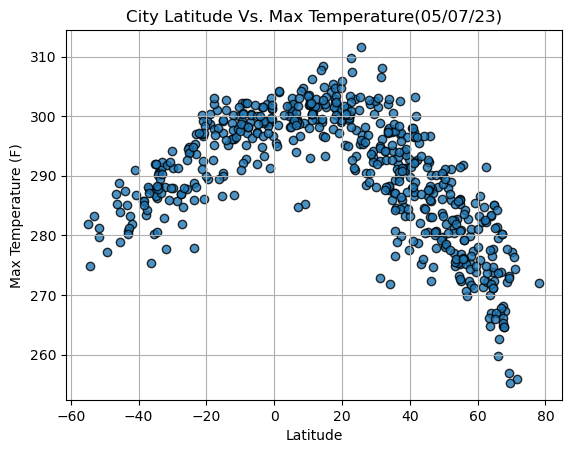

In [28]:
# Build scatter plot for latitude vs. temperature
x_values=city_data_df['Lat'],
y_values=city_data_df['Max Temp']
plt.scatter(x_values,
            y_values,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Max Temperature(%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

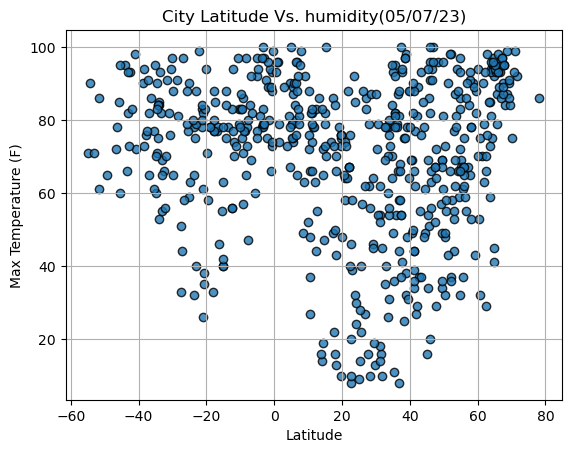

In [29]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
x_values=city_data_df['Lat'],
y_values=city_data_df['Humidity']
plt.scatter(x_values,
            y_values,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude Vs. humidity(%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

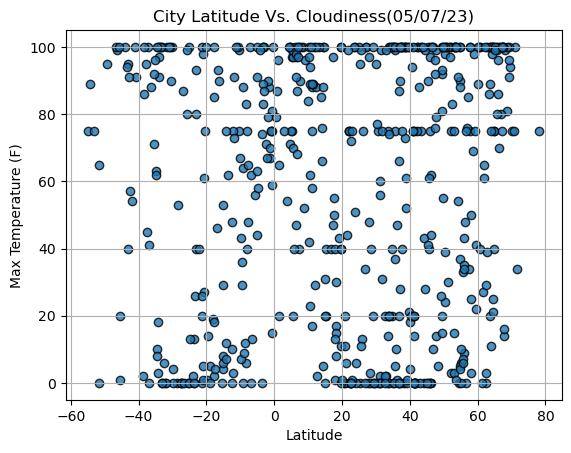

In [30]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
x_values=city_data_df['Lat'],
y_values=city_data_df['Cloudiness']
plt.scatter(x_values,
            y_values,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude Vs. Cloudiness(%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

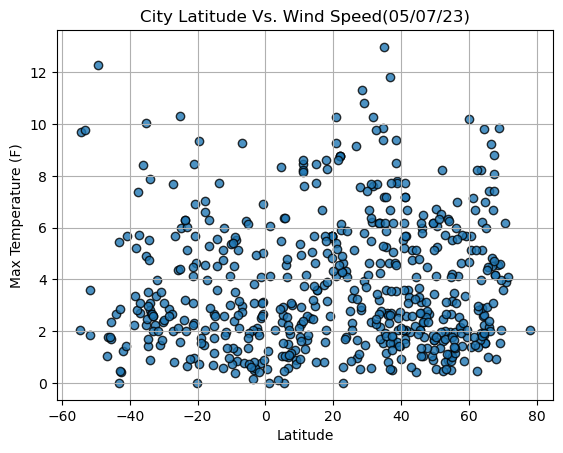

In [31]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
x_values=city_data_df['Lat'],
y_values=city_data_df['Wind Speed']
plt.scatter(x_values,
            y_values,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude Vs. Wind Speed(%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [69]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def linear_regression_plot(x_values,y_values,title,text_coordinates):
   
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept  
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(5.8,0.8),fontsize=8,color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Max Temp")
    print(f"The r-squared is: {rvalue}")
    plt.show()
    

In [70]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df=city_data_df.loc[(city_data_df["Lat"]>= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,malesherbes,48.2957,2.4094,288.11,96,5,2.67,FR,1683497330
3,lata,40.1629,-8.3327,289.71,88,18,0.91,PT,1683497331
5,hawaiian paradise park,19.5933,-154.9731,299.28,75,100,5.66,US,1683497103
8,tazovsky,67.4667,78.7000,268.23,95,100,8.80,RU,1683497331
10,bethel,41.3712,-73.4140,296.57,39,20,2.57,US,1683497287


In [71]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE 
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"]< 0)]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,cidreira,-30.1811,-50.2056,294.17,97,100,2.35,BR,1683497313
1,waitangi,-43.9535,-176.5597,287.49,95,100,2.68,NZ,1683497291
4,grytviken,-54.2811,-36.5092,274.91,90,89,9.71,GS,1683497292
6,blackmans bay,-43.0167,147.3167,280.66,82,95,2.84,AU,1683497292
7,port-aux-francais,-49.3500,70.2167,277.19,65,95,12.30,TF,1683497290


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.8304758277094946


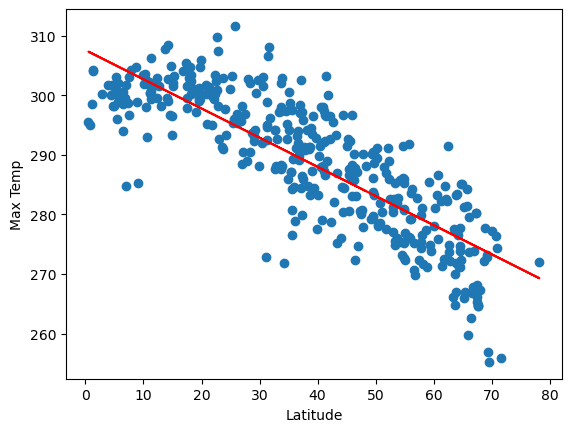

In [72]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
linear_regression_plot(x_values,y_values, 'Max Temp', (6,30))

The r-squared is: 0.8083204899557425


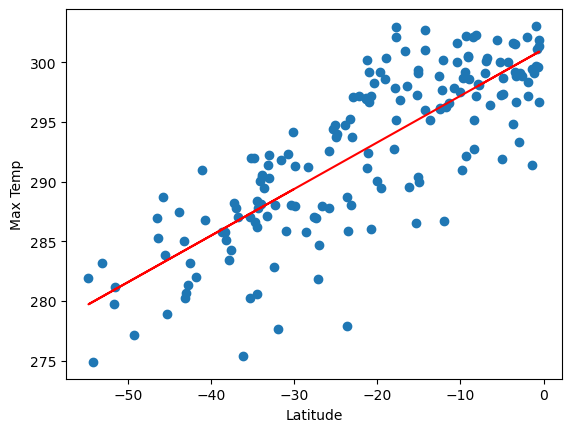

In [74]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
linear_regression_plot(x_values,y_values, 'Max Temp', (-30,40))

**Discussion about the linear relationship:** Both trends ending at the same peak temperature and latitude.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.16701049146544805


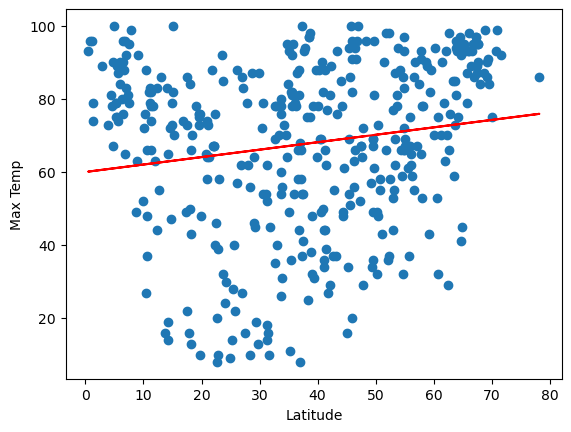

In [82]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
linear_regression_plot(x_values,y_values, 'Humidity', (40,10))


The r-squared is: 0.06536849798963326


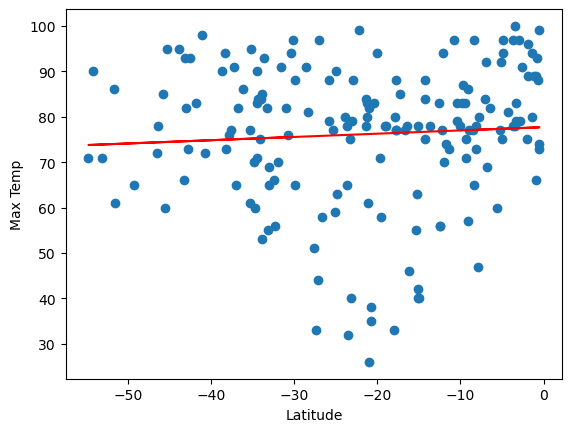

In [81]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
linear_regression_plot(x_values,y_values, 'Humidity', (-30,150))

**Discussion about the linear relationship:** Northern Hemisphere humidity percentages seem to largely cluster above 50%.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.057840557811166336


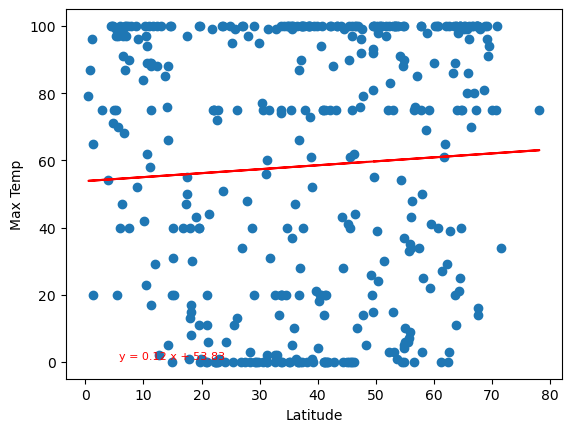

In [80]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
linear_regression_plot(x_values,y_values, 'Cloudiness', (40,10))


The r-squared is: -0.03018280390075109


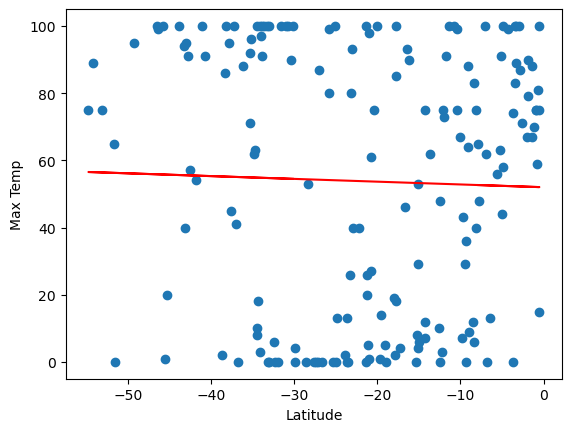

In [83]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
linear_regression_plot(x_values,y_values, 'Cloudiness', (-30,30))

**Discussion about the linear relationship:** The data seems to show no relationship between cloudiness and latitude for the northern hemisphere and southern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: -0.00825123501095053


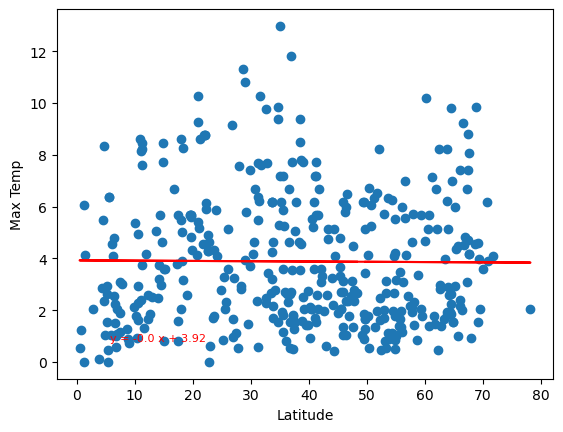

In [79]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
linear_regression_plot(x_values,y_values, 'Wind Speed', (40,25))


The r-squared is: -0.14075199258005466


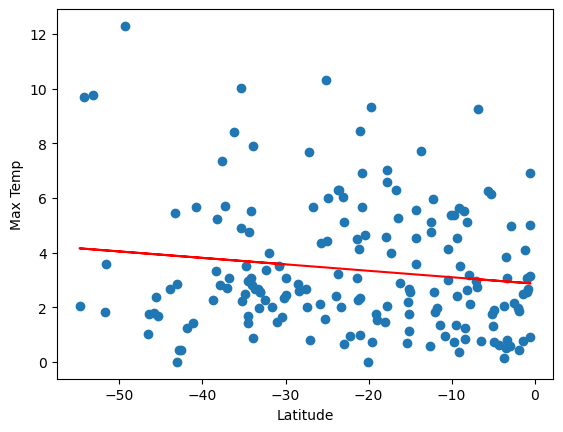

In [84]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
linear_regression_plot(x_values,y_values, 'Wind Speed', (-30,30))

**Discussion about the linear relationship:** The data seems to show no relationship between wind speed and latitude for the southern hemisphere.

